In [1]:
import numpy as np
import matplotlib.pyplot as plt
from enmspring.graphs_bigtraj import StackMeanModeAgent
from enmspring.kappa_mat import KMat, KappaStrand, Kappa, KappaUpperDown, MeanKappaStrand, MeanKappaStrandHetreo
from matplotlib.colors import Normalize
rootfolder = '/home/ytcdata/bigtraj_fluctmatch/500ns'

### Part 1: Initialize s-agent

In [2]:
host = 'atat_21mer'
interval_time = 500
s_agent = StackMeanModeAgent(host, rootfolder, interval_time)

/home/ytcdata/bigtraj_fluctmatch/500ns/atat_21mer/mean_mode_npy exists
/home/ytcdata/bigtraj_fluctmatch/500ns/atat_21mer/bdna+bdna/0_500/pd_dfs exists
Read Dataframe of stacking: df_st
/home/ytcdata/bigtraj_fluctmatch/500ns/atat_21mer/bdna+bdna/250_750/pd_dfs exists
Read Dataframe of stacking: df_st
/home/ytcdata/bigtraj_fluctmatch/500ns/atat_21mer/bdna+bdna/500_1000/pd_dfs exists
Read Dataframe of stacking: df_st
/home/ytcdata/bigtraj_fluctmatch/500ns/atat_21mer/bdna+bdna/750_1250/pd_dfs exists
Read Dataframe of stacking: df_st
/home/ytcdata/bigtraj_fluctmatch/500ns/atat_21mer/bdna+bdna/1000_1500/pd_dfs exists
Read Dataframe of stacking: df_st
/home/ytcdata/bigtraj_fluctmatch/500ns/atat_21mer/bdna+bdna/1250_1750/pd_dfs exists
Read Dataframe of stacking: df_st
/home/ytcdata/bigtraj_fluctmatch/500ns/atat_21mer/bdna+bdna/1500_2000/pd_dfs exists
Read Dataframe of stacking: df_st
/home/ytcdata/bigtraj_fluctmatch/500ns/atat_21mer/bdna+bdna/1750_2250/pd_dfs exists
Read Dataframe of stacking:

### Part 2: Initialize K-Matrix

In [3]:
kmat_agent = KMat(s_agent)

Load laplacian_mat from /home/ytcdata/bigtraj_fluctmatch/500ns/atat_21mer/mean_mode_npy/laplacian.npy
Thare are 399 nodes.
Total number of nodes: 399
There are 200 eigenvectors belonging to STRAND1.
There are 199 eigenvectors belonging to STRAND2.
Sum of two strands: 399


### Part 3: Initialize Strand Plot

In [4]:
# For a_tract_21mer, g_tract_21mer
strand_id = 'STRAND2'
ks_agent = KappaStrand(host, strand_id, s_agent, kmat_agent)
m_agent = MeanKappaStrand(host, strand_id, s_agent, kmat_agent)

In [8]:
# For atat_21mer, gcgc_21mer
basetype_i = 'T' # 'A', 'T', 'G', 'C'
m_agent = MeanKappaStrandHetreo(host, basetype_i, s_agent, kmat_agent)

### Part 4: Set $m$ and $n$

In [5]:
m = 1
n = s_agent.n_node # s_agent.n_node

### Part 5: Observe Min and Max

In [14]:
minimum, maximum = ks_agent.get_kmin_kmax(m, n)
minimum = 0

Min: -0.000  Max: 3.246


Min: -0.283  Max: 5.001

In [11]:
minimum = 1.5 # 1.0 or 1.5
maximum = 3.246

### Part 6: Set Colors Normalize Object

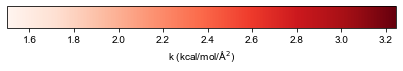

In [20]:
figsize = (6, 2)
cb1 = ks_agent.plot_colorbar(figsize, minimum, maximum)
plt.savefig('/home/yizaochen/Desktop/drawzone_temp/colorbar.png', dpi=200, transparent=False)
plt.show()

### Part 7: Plot

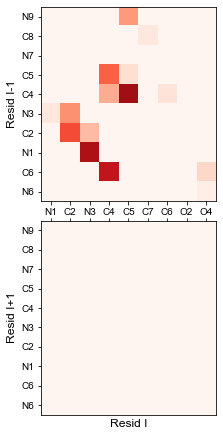

In [12]:
figsize = (4, 7.5)
fig, im_k, im_j, axes = m_agent.plot_mean_heatmap(figsize, m, n, minimum, maximum)
#plt.tight_layout()
if host in ['a_tract_21mer', 'g_tract_21mer']:
    plt.savefig(f'/home/yizaochen/Desktop/drawzone_temp/{host}_{strand_id}_{m}_{n}.png', dpi=200, transparent=False)
elif host in ['atat_21mer', 'gcgc_21mer']:
    plt.savefig(f'/home/yizaochen/Desktop/drawzone_temp/{host}_{basetype_i}_{m}_{n}.png', dpi=200, transparent=False)
plt.show()